#### KBins Discretizer
###### divide os dados contínuos em intervalos e tem alguns parâmetros (consultar documentação)
###### https://scikit-learn.org/stable/modules/preprocessing.html#discretization

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv(r'c:/Users/carol/Downloads/train2.csv')

In [3]:
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titulos
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss


In [4]:
#importando o KBinsDiscretizer
from sklearn.preprocessing import KBinsDiscretizer

In [5]:
est = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform')

In [6]:
est = est.fit(titanic[['Fare']])

In [7]:
titanic['Fare_disc'] = est.transform(titanic[['Fare']])

In [8]:
titanic.Fare_disc.value_counts()

0.0    838
1.0     33
2.0     17
4.0      3
Name: Fare_disc, dtype: int64

In [11]:
contagem = titanic.Fare_disc.value_counts().values
contagem

array([838,  33,  17,   3], dtype=int64)

In [12]:
import numpy as np
contagem = np.insert(contagem, 3,0)
contagem

array([838,  33,  17,   0,   3], dtype=int64)

In [13]:
#usando o aggregate do Pandas com o Group By para verificar o mínimo, máximo e contagem
grupos = titanic.groupby('Fare_disc')['Fare'].agg(['min','max','count']).reset_index()
grupos

,Fare_disc,min,max,count
0,0.0,0.0000,93.5000,838
1,1.0,106.4250,164.8667,33
2,2.0,211.3375,263.0000,17
3,4.0,512.3292,512.3292,3


In [14]:
grupos['comp'] = grupos['max'] - grupos['min']
grupos

,Fare_disc,min,max,count,comp
0,0.0,0.0000,93.5000,838,93.5000
1,1.0,106.4250,164.8667,33,58.4417
2,2.0,211.3375,263.0000,17,51.6625
3,4.0,512.3292,512.3292,3,0.0000


In [15]:
#o comprimento será calculado considerando todo o range e dividindo em 5, ddepois os pontos serão arupados considerando cada uma das 5 regiões


In [16]:
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
titanic.Fare.max() - titanic.Fare.min()

512.3292

In [19]:
(titanic.Fare.max() - titanic.Fare.min()) /5 

102.46584

In [20]:
#verificando os limites dos grupos gerados
est.bin_edges_[0][:5]

array([  0.     , 102.46584, 204.93168, 307.39752, 409.86336])

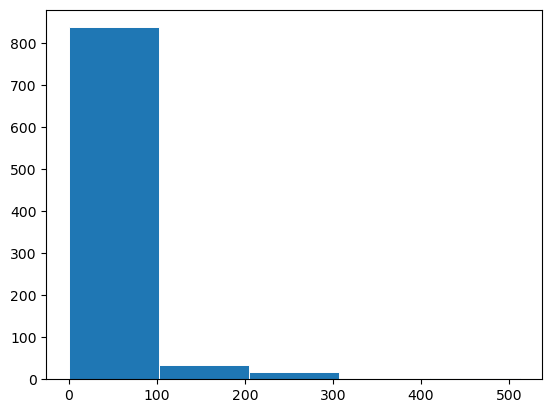

In [23]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.bar(est.bin_edges_[0][:5],
      contagem,
      width=(titanic.Fare.max()-titanic.Fare.min())/5,edgecolor='white',linewidth = 0.7,align = 'edge')
plt.show()